<br>
<br>
<center>

|Title:     | NLP Assignment 2, Question-2, ELMO TASK |
|         :-            |                             :-:                               |
| **Resource Person:**  | Dr. Maryam Bashir                                      |
| **Course Title:**     | Natural Language Processing                                                 |
| **Credit Hours:**     | 3(3,0)                                                        |
| **Work Objective:**     | Implementation of DL models with Embedding                 |
<br>
            |          **Submitted By** |

|Sr. # | Name                   | Registration No. | Email Address           |
| :-   | :-                     | :-               | :-                      
| 1    | Asif Ahsan | 20L-2370         | l202370@lhr.nu.edu.pk |

<br>

## Importing Libraries

In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from keras.preprocessing import sequence

import tensorflow as tf

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

## Dataset loading

In [55]:
df = pd.read_csv("/content/urdu-sentiment-corpus-v1.tsv",delimiter='\t')

In [56]:
df.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,ٹویٹر کا خیال کیسے آیا ؟,O
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P


In [57]:
df.Class.value_counts()

N    499
P    480
O     20
Name: Class, dtype: int64

In [58]:
df = df[df.Class != "O"]

In [59]:
df.Class.value_counts()

N    499
P    480
Name: Class, dtype: int64

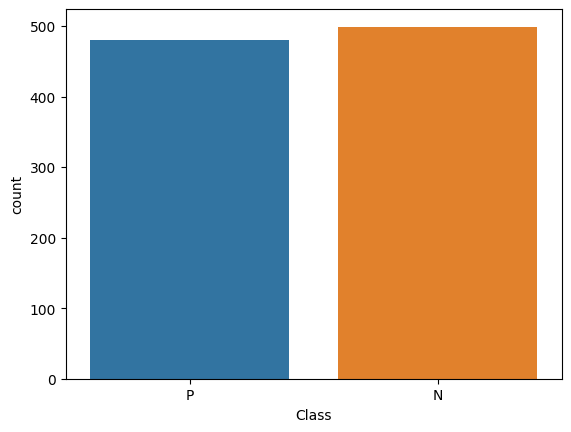

In [60]:
import seaborn as sns
sns.countplot( x = 'Class', data = df );

## Preprocessing data

In [61]:
import re

stop_words = []
with open("/content/stopwords-ur.txt",'r',encoding="utf8") as file:
  for item in file:
      stop_words.append(item.partition('\n')[0])

corpus_data = []
for i in range(len(df)):
    doc = re.sub('[^ا-ے]',' ',df.iloc[:,0].values[i])
    doc = doc.split()
    doc = [word for word in doc if not word in stop_words]
    doc =' '.join(doc)
    if doc is not None:
        corpus_data.append(doc)
num_words = len(corpus_data) 
num_words

980

**Cleaned Dataset**

In [63]:
df['cleaned_data'] = corpus_data
df.head()

,Tweet,Class,cleaned_data
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,میں نے ایٹم بم بنایا ھے او بھا ایٹم بمب کوٹ لک...
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,چندے سے انقلاب عمران خان وزیر اعظم نہیں بن سکتے
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,سرچ انجن گوگل نا صدر نے فضا میں فٹ بلندی چھلان...
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,ابھی اسکی لہریں کبھی کبھی جاتی یار ْ
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N,گندی زبان گٹر جیسے دماغ جاهل جیالے هو تم جیالا...


## ELMO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!pip install elmoformanylangs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00


In [19]:
# highway error
!pip uninstall overrides
!pip install overrides==3.1.0

Found existing installation: overrides 7.3.1
Uninstalling overrides-7.3.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/overrides-7.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/overrides/*
Proceed (Y/n)? Y
  Successfully uninstalled overrides-7.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl size=10173 sha256=50a808b75e65db8f223f0066642db22bf83594d91a538172144bf7eee388d547
  Stored in directory: /root/.cache/pip/wheels/bd/23/63/4d5849844f8f9d32be09e1b9b278e80de2d8314fbf1e28068b
Successfully built overrides


In [4]:
from elmoformanylangs.elmo import Embedder

In [19]:
model_path = '/content/drive/MyDrive/NLP/177'
embedder = Embedder(model_path)

INFO:elmoformanylangs:char embedding size: 3272
INFO:elmoformanylangs:word embedding size: 171020
INFO:elmoformanylangs:Model(
  (token_embedder): ConvTokenEmbedder(
    (word_emb_layer): EmbeddingLayer(
      (embedding): Embedding(171020, 100, padding_idx=3)
    )
    (char_emb_layer): EmbeddingLayer(
      (embedding): Embedding(3272, 50, padding_idx=3269)
    )
    (convolutions): ModuleList(
      (0): Conv1d(50, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(50, 32, kernel_size=(2,), stride=(1,))
      (2): Conv1d(50, 64, kernel_size=(3,), stride=(1,))
      (3): Conv1d(50, 128, kernel_size=(4,), stride=(1,))
      (4): Conv1d(50, 256, kernel_size=(5,), stride=(1,))
      (5): Conv1d(50, 512, kernel_size=(6,), stride=(1,))
      (6): Conv1d(50, 1024, kernel_size=(7,), stride=(1,))
    )
    (highways): Highway(
      (_layers): ModuleList(
        (0-1): 2 x Linear(in_features=2048, out_features=4096, bias=True)
      )
    )
    (projection): Linear(in_features=2148, out_f

In [20]:
def word_vector_elmo(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += embedder.sents2elmo(word)[0][0].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0.:
        vec /= count
    return vec

In [21]:
corpus = df.corpous.apply(lambda x: str(x).split()) # tokenizing
wordvec_arrays = np.zeros((len(corpus), 1024))

In [22]:
for i in range(len(corpus)):
    wordvec_arrays[i,:] = word_vector_elmo(corpus[i],1024)
    
wordvec_data = pd.DataFrame(wordvec_arrays)
wordvec_data.shape

Streaming output truncated to the last 5000 lines.
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batches, avg len: 3.0
INFO:elmoformanylangs:1 batch

(980, 1024)

In [25]:
wordvec_data.to_csv("elmo_urdu_emb.csv",index=False)

In [26]:
wordvec_elmos = pd.read_csv('/content/elmo_urdu_emb.csv')
wordvec_elmos = wordvec_elmos.values
wordvec_elmos.shape

(980, 1024)

In [29]:
from sklearn.model_selection import train_test_split
num_words = len(corpus_data)

X_train, X_test, y_train, y_test = train_test_split(df.cleaned_data, df.Class,test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.astype(str)
X_test  = X_test.astype(str)

tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen=128,truncating='post',padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=128,truncating='pre',padding='pre')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [30]:
model_bilstm = Sequential([
    Embedding(input_dim=len(wordvec_elmos),
                            output_dim=1024,
                            weights=[wordvec_elmos],
                            input_length=128,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='tanh', dropout=0.3, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='tanh', dropout=0.3, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
model_bilstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 1024)         1003520   
                                                                 
 bidirectional (Bidirectiona  (None, 128, 400)         1960000   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              400800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 3,364,521
Trainable params: 2,361,001
Non-trainable params: 1,003,520
_________________________________________________________________


In [42]:
from keras.callbacks import EarlyStopping
hist_Elmo = model_bilstm.fit(X_train,y_train,epochs=10,batch_size=64,verbose=2,validation_data=(X_test,y_test), callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4))

Epoch 1/10
11/11 - 97s - loss: 0.8413 - accuracy: 0.5117 - precision: 0.5000 - recall: 0.4299 - val_loss: 0.7014 - val_accuracy: 0.5034 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 97s/epoch - 9s/step
Epoch 2/10
11/11 - 80s - loss: 0.6966 - accuracy: 0.4971 - precision: 0.4879 - recall: 0.5403 - val_loss: 0.6959 - val_accuracy: 0.5034 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 80s/epoch - 7s/step
Epoch 3/10
11/11 - 80s - loss: 0.6926 - accuracy: 0.5000 - precision: 0.4737 - recall: 0.2149 - val_loss: 0.6984 - val_accuracy: 0.4966 - val_precision: 0.4966 - val_recall: 1.0000 - 80s/epoch - 7s/step
Epoch 4/10
11/11 - 84s - loss: 0.6949 - accuracy: 0.4956 - precision: 0.4872 - recall: 0.5672 - val_loss: 0.7035 - val_accuracy: 0.5034 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 84s/epoch - 8s/step
Epoch 5/10
11/11 - 78s - loss: 0.6947 - accuracy: 0.4781 - precision: 0.4743 - recall: 0.6060 - val_loss: 0.6949 - val_accuracy: 0.5034 - val_precision: 0.0000e+00 

In [45]:
accuracy = hist_Elmo.history['accuracy'][-1]
precision = hist_Elmo.history['precision'][-1]
recall = hist_Elmo.history['recall'][-1]
f_score = 2 * (precision * recall) / (precision + recall)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t", "_" * 40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t",
      "F-score:", f_score, "\n")
# print(f"Accuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1Score : {F1Scrore}")


							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.5422740578651428      |	 Precision: 0.5458333492279053      |	 Recall: 0.3910447657108307     |	 F-score: 0.4556521723851812 



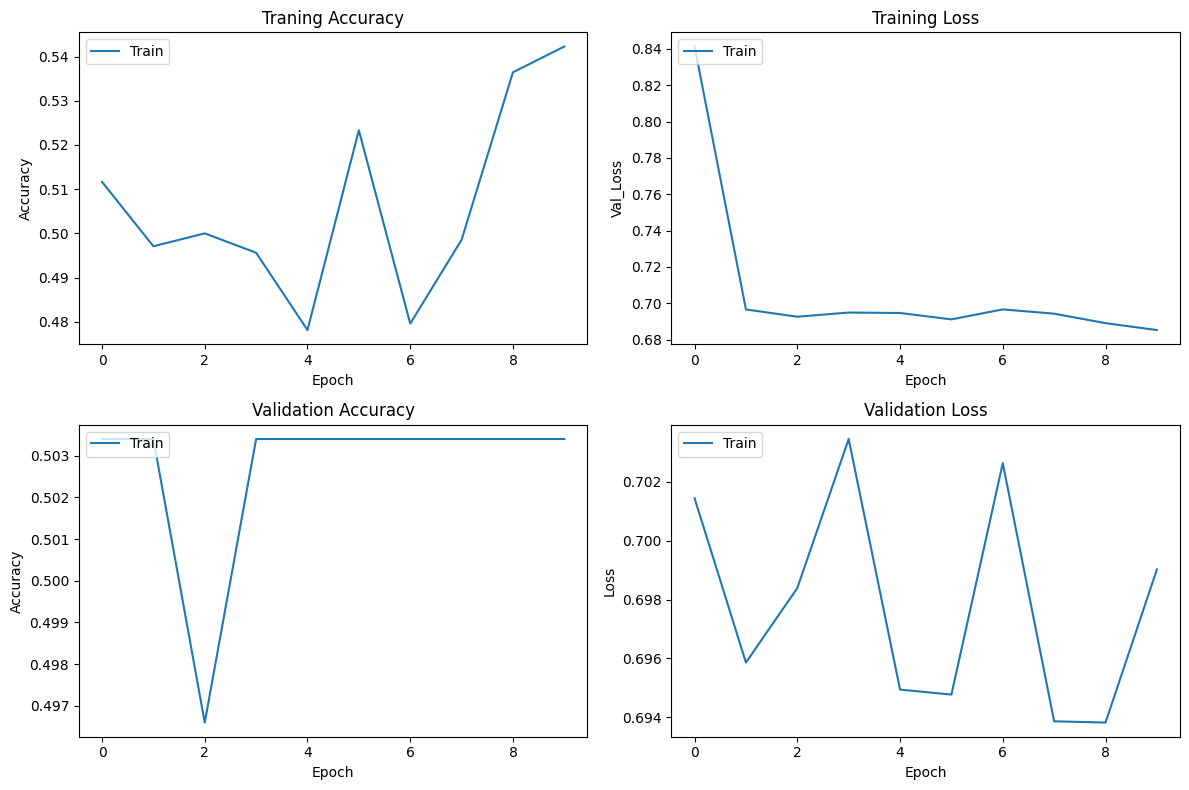

In [46]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first graph on the top-left axis
axes[0, 0].plot(hist_Elmo.history['accuracy'])
axes[0, 0].set_title('Traning Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the top-right axis
axes[0, 1].plot(hist_Elmo.history['loss'])
axes[0, 1].set_title('Training Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_Loss')
axes[0, 1].legend(['Train', 'Test'], loc='upper left')

# Plot the third graph on the bottom-left axis
axes[1, 0].plot(hist_Elmo.history['val_accuracy'])
axes[1, 0].set_title('Validation Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend(['Train', 'Test'], loc='upper left')

# Plot the fourth graph on the bottom-right axis
axes[1, 1].plot(hist_Elmo.history['val_loss'])
axes[1, 1].set_title('Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend(['Train', 'Test'], loc='upper left')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()